In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words = 10000)

In [3]:
max([max(sequence) for sequence in train_data])

9999

In [4]:
import numpy as np
def vecorized_sequences(sequences , dimention =10000):
    results = np.zeros((len(sequences), dimention))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

In [5]:
x_train = vecorized_sequences(train_data)
x_test = vecorized_sequences(test_data)

In [6]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [7]:
x_val = x_train[:11000]
x_partial_train = x_train[11000:]
y_val = y_train[:11000]
partial_y_train = y_train[11000:]

In [8]:
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import metrics
from keras import activations

In [16]:
model = models.Sequential()
model.add(layers.Dense(64 , activation=activations.tanh, input_shape=(10000,)))
model.add(layers.Dense(32, activation=activations.relu))
model.add(layers.Dense(16, activation=activations.tanh))
model.add(layers.Dense(1, activation=activations.tanh))
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.mse, metrics=[metrics.binary_accuracy])

In [17]:
history = model.fit(x_partial_train,partial_y_train, epochs=10, batch_size=512, validation_data=(x_val,y_val))

Train on 14000 samples, validate on 11000 samples
Epoch 1/10
14000/14000 [==============================] - 3s 246us/step - loss: 0.1899 - binary_accuracy: 0.7239 - val_loss: 0.1050 - val_binary_accuracy: 0.8715
Epoch 2/10
14000/14000 [==============================] - 3s 223us/step - loss: 0.0850 - binary_accuracy: 0.8939 - val_loss: 0.0947 - val_binary_accuracy: 0.8739
Epoch 3/10
14000/14000 [==============================] - 3s 216us/step - loss: 0.0551 - binary_accuracy: 0.9329 - val_loss: 0.0866 - val_binary_accuracy: 0.8864
Epoch 4/10
14000/14000 [==============================] - 3s 221us/step - loss: 0.0386 - binary_accuracy: 0.9531 - val_loss: 0.1026 - val_binary_accuracy: 0.8697
Epoch 5/10
14000/14000 [==============================] - 3s 217us/step - loss: 0.0293 - binary_accuracy: 0.9659 - val_loss: 0.0927 - val_binary_accuracy: 0.8805
Epoch 6/10
14000/14000 [==============================] - 3s 217us/step - loss: 0.0224 - binary_accuracy: 0.9749 - val_loss: 0.0940 - val_bi

In [18]:
history_dict = history.history

In [19]:
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

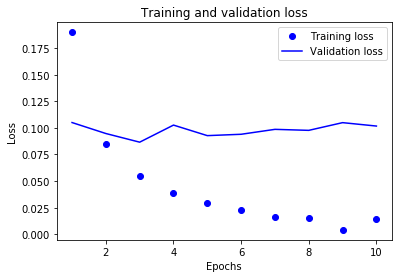

In [20]:
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['binary_accuracy']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

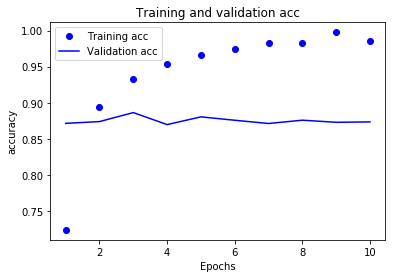

In [21]:
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
epochs = range(1, len(history_dict['binary_accuracy']) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()